################################################################################

**Author**: _Pradip Kumar Das_

**License:** https://github.com/PradipKumarDas/Competitions/blob/main/LICENSE

**Profile & Contact:** [LinkedIn](https://www.linkedin.com/in/daspradipkumar/) | [GitHub](https://github.com/PradipKumarDas) | [Kaggle](https://www.kaggle.com/pradipkumardas) | pradipkumardas@hotmail.com (Email)

################################################################################

# Tabular Playground Series - Nov. 2021

**Nov 01, 2021 to Nov 30, 2021**

https://www.kaggle.com/c/tabular-playground-series-nov-2021/

_**Predicting identifying spam emails via various extracted features from the email.**_

**Sections:**
- Dependencies
- Exploratory Data Analysis (EDA) & Preprocessing
- Modeling & Evaluation
- Submission

## Dependencies

In [1]:
# Loads required packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

from xgboost import XGBClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import gc

## Exploratory Data Analysis (EDA) & Preprocessing

In [2]:
# Configures plot styles

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

In [48]:
# Loads train dataset
train = pd.read_csv("./data/train.csv")

In [49]:
# Checks how the train data set looks
train

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,2.099590,...,1.098620,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0
1,1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,4.545940,...,3.460170,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0
2,2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,1.801870,...,4.883000,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.141120,0.124464,0.148209,0
3,3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,4.503320,...,3.474390,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0
4,4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,3.371450,...,1.910590,-0.042943,0.105616,0.125072,0.037509,1.043790,1.074810,-0.012819,0.072798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.043008,1.640550,1375.8900,1.087030,0.839580,1.69362,3.843520,1.108250,1.505390,...,1.552280,0.080317,0.017643,0.225133,0.073179,4.436510,1.739330,0.049038,0.065804,1
599996,599996,0.137048,4.826860,-99.6478,0.985289,0.037712,3.30370,2.471790,5.942130,0.875148,...,1.345210,0.092457,0.081926,0.234041,0.041383,3.873990,1.870100,0.162313,0.085662,0
599997,599997,1.316220,0.502062,66.2360,2.233020,0.060038,3.77371,2.655340,3.155890,1.055020,...,2.181150,0.032708,0.109668,0.027466,0.061931,-0.383329,0.922113,0.084864,0.052635,0
599998,599998,0.511918,3.827470,777.8720,0.285914,0.520157,2.76285,2.522200,1.561360,1.971140,...,0.366702,0.070943,0.071452,-0.038071,0.038829,-0.122888,3.107790,0.061333,0.004179,1


In [50]:
# Drops ID column as it is not required
train.drop(["id"], axis=1, inplace=True)

In [51]:
# Checks for data types used in the data set
train.dtypes.value_counts()

float64    100
int64        1
dtype: int64

In [52]:
# Checks for nubmer of row having any missing values ('0' indicates no rows have missing values)
sum(train.isna().sum())

0

In [53]:
# Checks the basic statstics for the train dataset
train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.306508,2.497590,306.644536,2.647901,0.177850,2.556832,2.699650,2.571593,2.538273,0.134370,...,2.444471,0.155260,0.059407,0.144932,0.106419,2.547853,2.590159,0.158881,0.123048,0.506010
std,0.522450,1.554018,551.743893,1.544529,0.417488,1.562527,1.564000,1.549361,1.532988,0.421892,...,1.542509,0.548397,0.119426,0.462015,0.209128,1.558427,1.525091,0.436190,0.264896,0.499964
min,-3.797450,-1.223960,-1842.530000,-1.368560,-3.206210,-1.169770,-1.059310,-1.281970,-1.242020,-2.577840,...,-1.217700,-9.761770,-4.666240,-3.101500,-1.276540,-1.584740,-1.254730,-3.993500,-2.783380,0.000000
25%,0.026222,1.186237,43.573400,1.442028,0.019709,1.261038,1.385820,1.333848,1.292163,0.019563,...,1.214177,0.018904,0.024483,0.017055,0.025461,1.247888,1.348078,0.013536,0.018105,0.000000
50%,0.097788,2.516500,133.626000,2.634130,0.061586,2.590425,2.801255,2.557985,2.475880,0.058752,...,2.386845,0.068906,0.056649,0.063439,0.062151,2.601940,2.682090,0.058058,0.058471,1.000000
75%,0.397184,3.787630,302.262250,3.907640,0.112712,3.813662,3.996913,3.823450,3.804360,0.101046,...,3.693872,0.125165,0.088162,0.113114,0.102016,3.820665,3.839520,0.110718,0.104872,1.000000
max,8.781500,6.226720,6119.280000,6.521150,8.265470,6.515070,6.586780,6.258770,6.389670,7.078460,...,6.573890,18.412800,10.211800,8.623270,3.657220,6.254360,6.145300,10.767000,5.988110,1.000000


f0        AxesSubplot(0.125,0.816017;0.065678x0.0639831)
f1     AxesSubplot(0.203814,0.816017;0.065678x0.0639831)
f2     AxesSubplot(0.282627,0.816017;0.065678x0.0639831)
f3     AxesSubplot(0.361441,0.816017;0.065678x0.0639831)
f4     AxesSubplot(0.440254,0.816017;0.065678x0.0639831)
                             ...                        
f95       AxesSubplot(0.519068,0.125;0.065678x0.0639831)
f96       AxesSubplot(0.597881,0.125;0.065678x0.0639831)
f97       AxesSubplot(0.676695,0.125;0.065678x0.0639831)
f98       AxesSubplot(0.755508,0.125;0.065678x0.0639831)
f99       AxesSubplot(0.834322,0.125;0.065678x0.0639831)
Length: 100, dtype: object

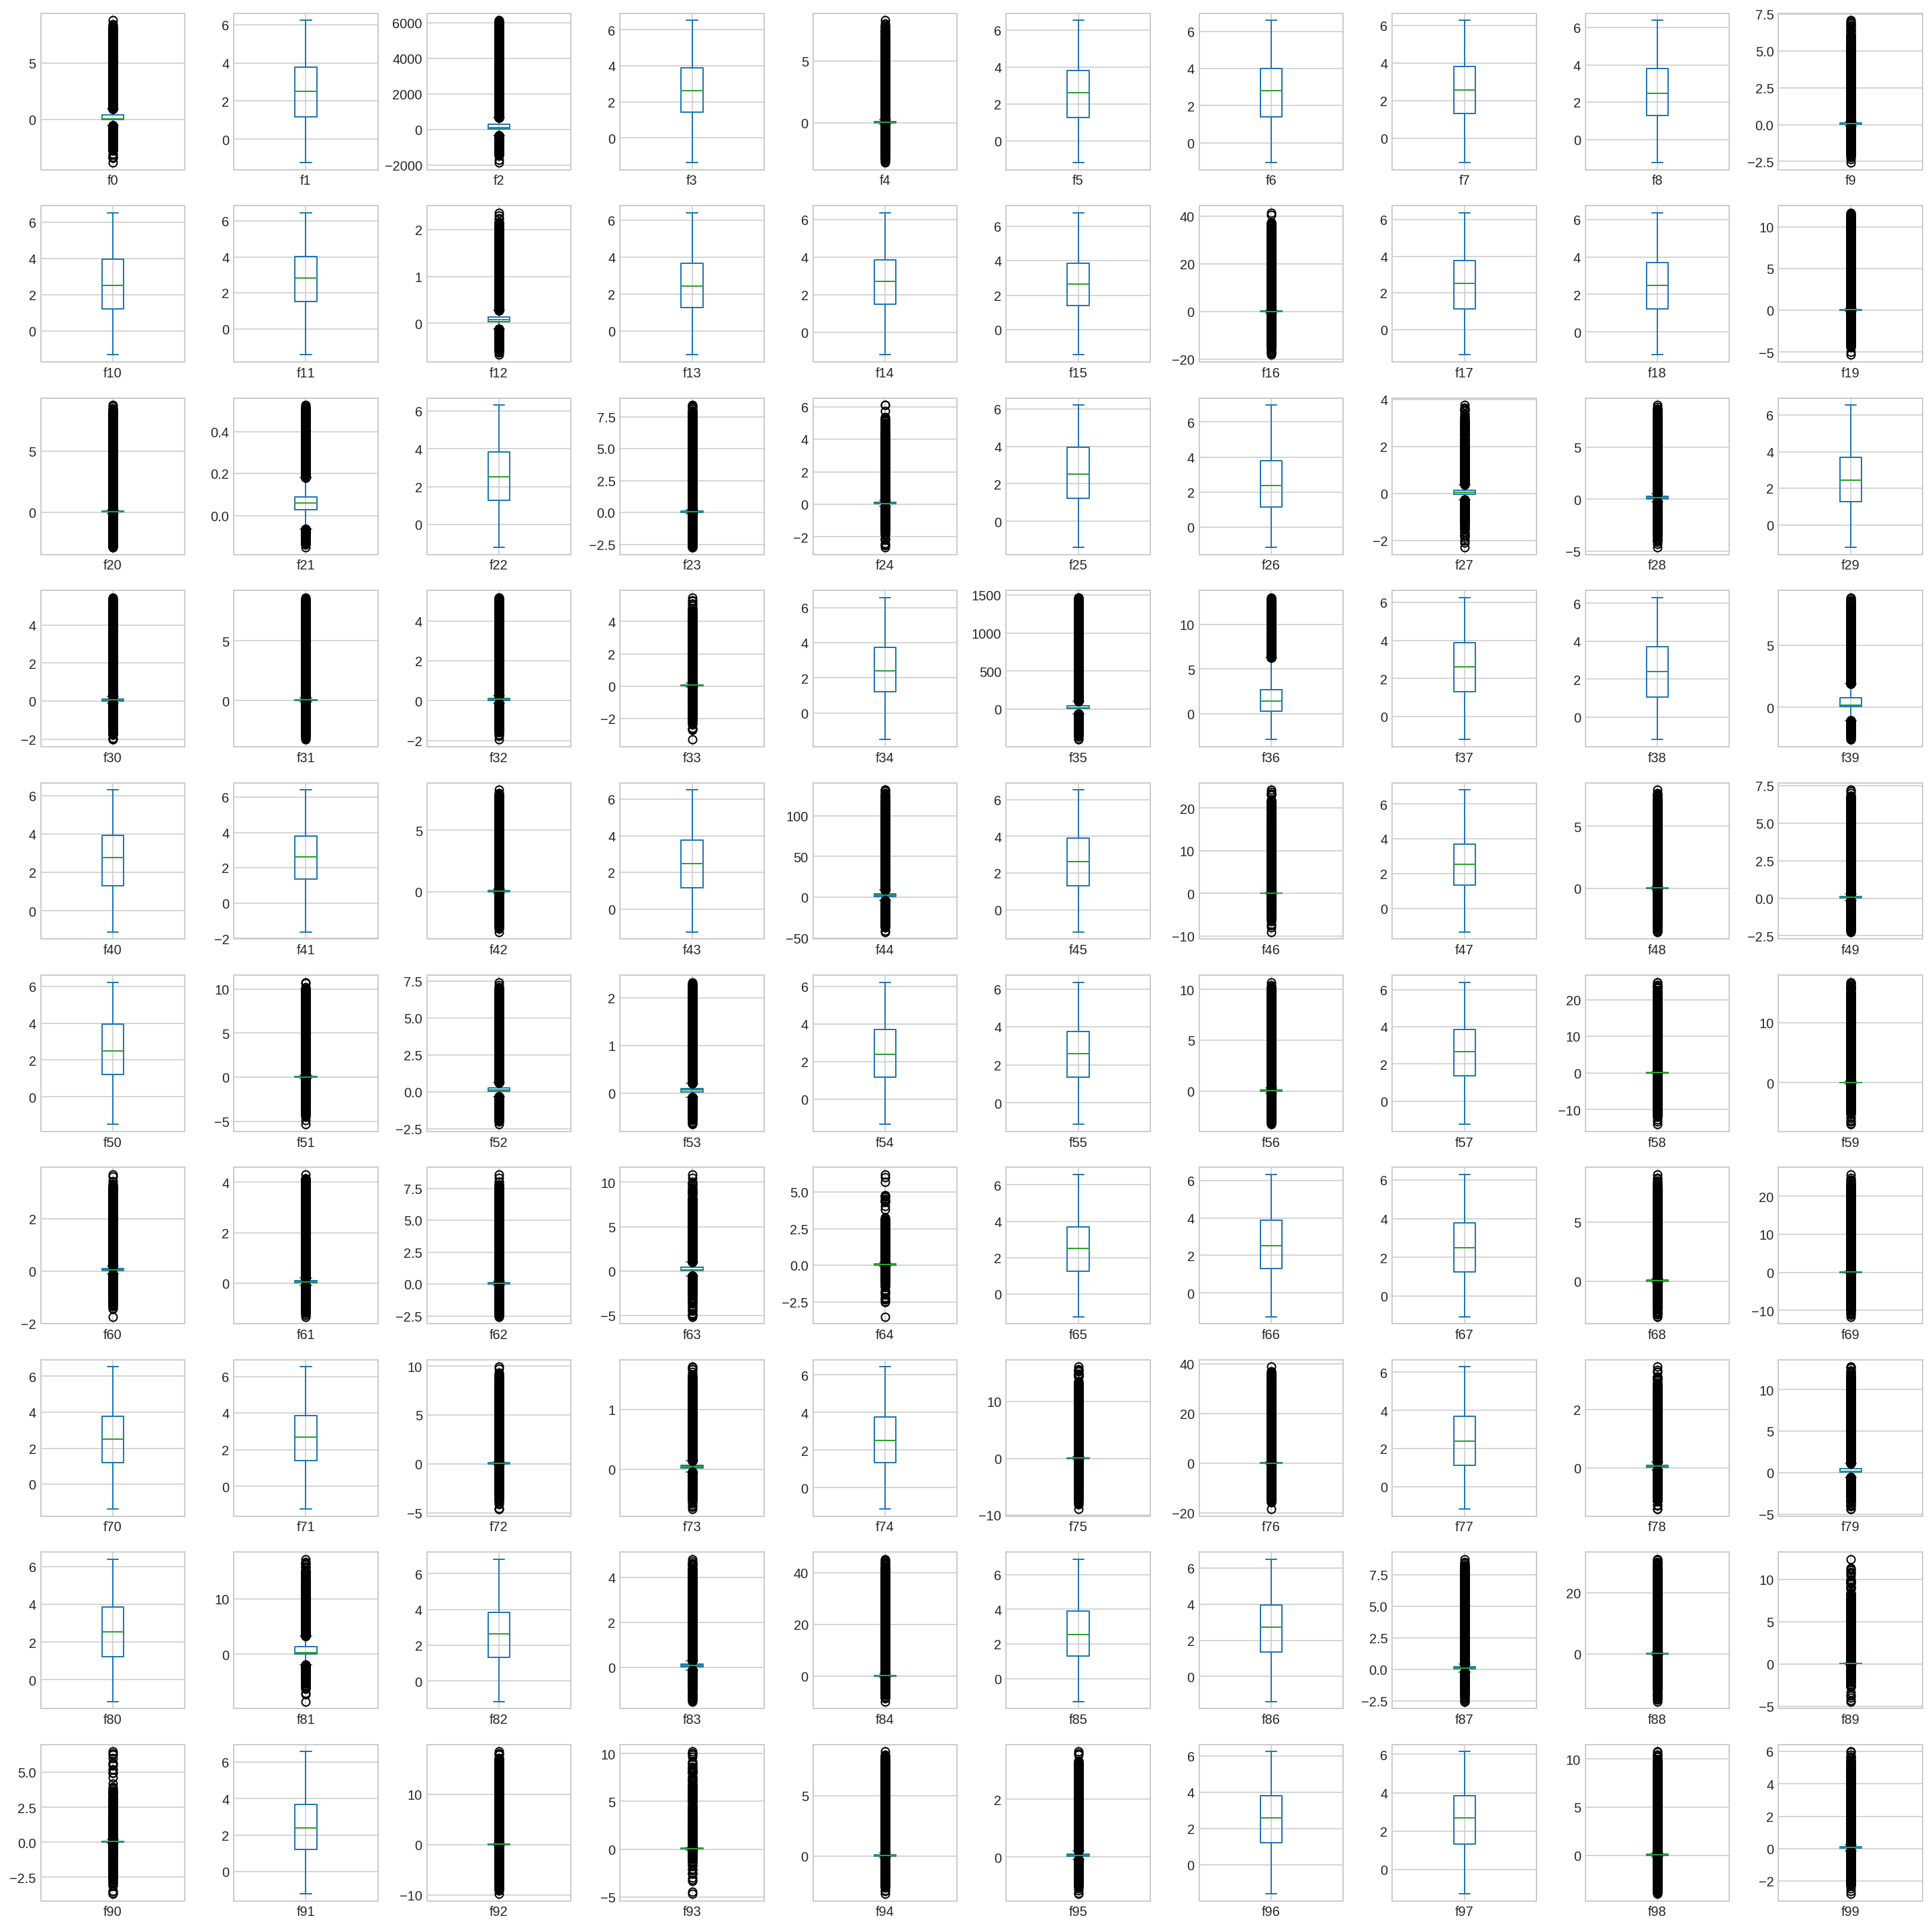

In [13]:
# Checks the distribution of each feature visually through plots
train.select_dtypes(["float"]).plot(subplots=True, layout=(10,10), figsize=(20, 20), kind="box")

In [5]:
# Checks the memory usage for training data before compression
train.memory_usage().sum()/1024**2

462.3414306640625

In [6]:
# Reduces memory usage by scale-down the datatype from float64 to float32
train[train.select_dtypes(["float64"]).columns] = train.select_dtypes(["float64"]).astype("float32")

In [7]:
# Checks the memory usage for training data after compression
train.memory_usage().sum()/1024**2

233.4595947265625

In [8]:
#Frees memoru after data compression
gc.collect()

23

In [9]:
# Checks the label distribution
train.target.value_counts()

1    303606
0    296394
Name: target, dtype: int64

**As `target` is equaly distributed, it itself can be used as bins in stratified K-Fold validation**

## Modeling & Evaluation

### Modeling with Tree-based Models

In [ ]:
# Seperates predictor variables from target

y = train.target
train.drop(["target"], axis=1, inplace=True)

In [ ]:
# Create stratification object for K-Fold cross validation
sk_fold = StratifiedKFold(n_splits=5)

In [ ]:
# Performs cross validation on XGB Classifier

cv_generator = sk_fold.split(train, y)

model = XGBClassifier(
    n_estimators=100,
    objective='binary:logistic', 
    eval_metric='auc',
    # tree_method='gpu_hist'
)

cv_scores = cross_val_score(model, train, y, scoring='roc_auc', cv=cv_generator, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.693) total time= 3.0min


/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] START .....................................................................
[CV] END ................................ score: (test=0.691) total time= 3.0min


/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] START .....................................................................
[CV] END ................................ score: (test=0.702) total time= 3.1min


/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 30.3min remaining: 45.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 30.5min remaining: 20.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 30.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 30.6min finished


In [ ]:
print("ROC AUC score of XGBoost (with default parameters) Model:", cv_scores.mean())

ROC AUC score of XGBoost (with default parameters) Model: 0.7150230634124533


In [ ]:
del cv_scores, model, cv_generator

[CV] START .....................................................................
[CV] END ................................ score: (test=0.695) total time= 3.0min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.694) total time=30.2min


/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: 

[CV] START .....................................................................
[CV] END ................................ score: (test=0.672) total time= 3.0min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.724) total time=30.3min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.723) total time=30.4min


/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] START .....................................................................
[CV] END ................................ score: (test=0.721) total time=30.5min


/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/pradip/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] START .....................................................................
[CV] END ................................ score: (test=0.713) total time=30.5min


### Modeling with Artificial Neural Network (ANN)

Below experiments were performed using ANNs over a fixed validation fold and results are shown below.

Based on these observations, number of epochs was set to 10 with no value for patience (number of iterations to try to check validation improvement over previous checkpoint). Among all epochs, weights for best epoch (the epoch against which highest validation score was found) were loaded to perform predictions on test data.

**Abbreviations & Notations:**

- HL: Hidden Layer

- Epochs Format: `<Best Epoch*>/<Early Stopped At>/<Total Epochs>`

- *: Epoch having highest validation score is considered best epoch.

- -- : Not Applicable

- Values of loss and metric are mentioned against best epoch.

- All models have same input and output layer.


| Exp. No. 	| HL 1		 | HL 2			 | HL 3 	| Epochs | Train Loss | Train AUC | Val. Loss | Val. AUC |
|-				|-					|-				|-				|-				|-				|-					|-					|-				|
| 1.			| 64+Relu	| --			| --			| -/-/1			| 0.5731	| 0.7570	| 0.5803		| 0.7452	|
| 2.			| 128+Relu	| --			| --			|  -/-/1		| 0.6082	| 0.7424	| 0.6022		| 0.7437	|
| 3.			| 64+Relu	| 64+Relu	| -- 			| -/-/1			| 0.5884	| 0.7476	| 0.5797		| 0.7450	|
| 4.			| 64+Relu	| 64+Relu	| -- 			| 3/7/10	| 0.5691 | 0.7575		| 0.5740		| 0.7475	|
| 5.			| 64+Relu	| 64+Relu	| --			| 7/15/30	| 0.5655 | 0.7642		| 0.5824		| 0.7462	|
| 6.			| 128+Relu	| 128+Relu | 64+Relu | 7/13/30	| 0.5629	| 0.7683	| 0.576			| 0.7450	|
| 7.			| 64+Relu	| 64+Relu | --				 | 8/18/30	| 0.5663	| 0.7661	| 0.5747	| 0.7466	|
| 8.			| 64+Relu	| --			| --				| 5/16/30	| 0.5731	| 0.7570	| 0.5795	| 0.7461	|

To view experiments visually, enter command `tensorboard --logdir <log dir>` where `<log dir>` is directory where all TensorBoard logs for experiments are stored.

**Observations:**

- Performance of model having single layer with 64 units is comparable with models having multiple layers and/or more units.
- Models perform their best within 10 epochs.

**Decisions:**

- Two hidden layers each having 64 units are considered for model to be used for K-Fold training and validation
- No `patience` will be used considering only 10 epochs. Best epoch's model weights will be used for prediction in each fold.

In [106]:
# Creates k-fold generator
cv_generator = sk_fold.split(train, y)

In [107]:
# Received the data indexes of the first fold 
(train_idx, val_idx) = next(cv_generator)

In [109]:
# Scales data to make it suitable for gradient based model training
train_X_scaler = StandardScaler()
train_X_scaler.fit(train.iloc[train_idx])

StandardScaler()

In [111]:
train_X = train_X_scaler.fit_transform(train.iloc[train_idx])
val_X = train_X_scaler.transform(train.iloc[val_idx])

In [114]:
# Builds the model
model = Sequential()
model.add(Input(shape=(len(train.columns),)))
model.add(Dense(64, activation="relu"))
# model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [115]:
# Compiles the model
model.compile(optimizer="adam", loss=BinaryCrossentropy(from_logits=False), metrics=AUC())

# Sets name to store model and to track its training against 
model_name = "dense-64-relu_epochs-30" + "_" + datetime.datetime.now().strftime("%Y.%m.%d-%H:%M:%S")

# Fits the model
history= model.fit(
    x=train_X,
    y=y[train_idx],
    batch_size=64,
    epochs=30,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True),
        ModelCheckpoint(filepath="./models/" + model_name, monitor="val_loss", save_best_only=True, save_weights_only=False),
        TensorBoard(log_dir="./logs/" + model_name, histogram_freq=1, update_freq='epoch')
    ],
    validation_data=(val_X, y[val_idx]), 
    use_multiprocessing=True
)

2021-11-12 20:37:54.836674: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-12 20:37:54.836777: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-12 20:37:54.836869: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/30
   2/7500 [..............................] - ETA: 9:04 - loss: 0.8268 - auc_14: 0.4264   

2021-11-12 20:37:56.022257: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-12 20:37:56.022373: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


  39/7500 [..............................] - ETA: 1:24 - loss: 0.7490 - auc_14: 0.5440

2021-11-12 20:37:56.209104: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-11-12 20:37:56.215972: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-11-12 20:37:56.217697: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/dense-64-relu_epochs-30_2021.11.12-20:37:54/train/plugins/profile/2021_11_12_20_37_56
2021-11-12 20:37:56.218672: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./logs/dense-64-relu_epochs-30_2021.11.12-20:37:54/train/plugins/profile/2021_11_12_20_37_56/avita-pura-ns14a6.trace.json.gz
2021-11-12 20:37:56.230987: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/dense-64-relu_epochs-30_2021.11.12-20:37:54/train/plugins/profile/2021_11_12_20_37_56
2021-11-12 20:37:56.231342: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data f

7500/7500 [==============================] - 32s 4ms/step - loss: 0.6196 - auc_14: 0.7289 - val_loss: 0.6052 - val_auc_14: 0.7418
INFO:tensorflow:Assets written to: ./models/dense-64-relu_epochs-30_2021.11.12-20:37:54/assets
Epoch 2/30
7500/7500 [==============================] - 29s 4ms/step - loss: 0.5963 - auc_14: 0.7482 - val_loss: 0.5870 - val_auc_14: 0.7455
INFO:tensorflow:Assets written to: ./models/dense-64-relu_epochs-30_2021.11.12-20:37:54/assets
Epoch 3/30
7500/7500 [==============================] - 32s 4ms/step - loss: 0.5783 - auc_14: 0.7533 - val_loss: 0.5844 - val_auc_14: 0.7444
INFO:tensorflow:Assets written to: ./models/dense-64-relu_epochs-30_2021.11.12-20:37:54/assets
Epoch 4/30
7500/7500 [==============================] - 28s 4ms/step - loss: 0.5744 - auc_14: 0.7560 - val_loss: 0.5815 - val_auc_14: 0.7451
INFO:tensorflow:Assets written to: ./models/dense-64-relu_epochs-30_2021.11.12-20:37:54/assets
Epoch 5/30
7500/7500 [==============================] - 30s 4ms/ste

In [31]:
# Loads test data set
test = pd.read_csv("./data/test.csv")

# Removes ID column as it is not required for prediction
test.drop(["id"], axis=1, inplace=True)

In [28]:
# Sets number of features for model to use
features_count = len(train.columns)

In [41]:
# Stores predictions for each fold
all_fold_predictions = []

# Creates k-fold generator
cv_generator = sk_fold.split(train, y)

# Initialise the first fold
fold = 1

# Iterates over folds for model to get trained on each fold and to predict on test data
for (train_idx, val_idx) in cv_generator:
    
    print(f"FOLD {fold}...")
    print("")
    
    # Scales data to make it suitable for gradient based model training
    train_X_scaler = StandardScaler()
    train_X = train_X_scaler.fit_transform(train.iloc[train_idx])
    val_X = train_X_scaler.transform(train.iloc[val_idx])
    
    # Builds model
    model = Sequential()
    model.add(Input(shape=(features_count,)))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    # Compiles the model
    model.compile(optimizer="adam", loss=BinaryCrossentropy(from_logits=False), metrics=AUC())    
    
    # Sets name to store model and to track its training against
    model_name = f"{fold}_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_{datetime.datetime.now().strftime('%Y.%m.%d-%H:%M:%S')}"

    # Fits the model
    model.fit(
        x=train_X,
        y=y[train_idx],
        batch_size=64,
        epochs=10,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True),
            ModelCheckpoint(filepath="./models/" + model_name, monitor="val_loss", save_best_only=True, save_weights_only=False),
            TensorBoard(log_dir="./logs/" + model_name, histogram_freq=1, update_freq='epoch')
        ],
        validation_data=(val_X, y[val_idx]), 
        use_multiprocessing=True
    )
    
    # Appends the fold specific model's predictions into list to be consolidated later
    all_fold_predictions.append(
        model.predict(train_X_scaler.transform(test)).reshape(-1))
    
    # Frees memory
    del model_name, model, val_X, train_X, train_X_scaler
    
    print(f"Fold {fold} completed.")
    print("")
    
    fold += 1

FOLD 1...



2021-11-13 19:13:53.851504: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:13:53.851554: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:13:53.851589: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/10
   3/7500 [..............................] - ETA: 11:15 - loss: 0.7469 - auc_4: 0.4767  

2021-11-13 19:13:54.627023: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:13:54.627076: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:13:54.747666: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-11-13 19:13:54.759774: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-11-13 19:13:54.761661: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/1_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:13:53/train/plugins/profile/2021_11_13_19_13_54
2021-11-13 19:13:54.762699: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./logs/1_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:13:53/train/plugins/profile/2021_11_13_19_13_54/avita-pura-ns14a6.trace.json.gz
2021-11-13 19:13:54.771491: I tensor

7500/7500 [==============================] - 32s 4ms/step - loss: 0.6057 - auc_4: 0.7343 - val_loss: 0.5784 - val_auc_4: 0.7461
INFO:tensorflow:Assets written to: ./models/1_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:13:53/assets
Epoch 2/10
7500/7500 [==============================] - 29s 4ms/step - loss: 0.5715 - auc_4: 0.7554 - val_loss: 0.5759 - val_auc_4: 0.7466
INFO:tensorflow:Assets written to: ./models/1_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:13:53/assets
Epoch 3/10
7500/7500 [==============================] - 36s 5ms/step - loss: 0.5687 - auc_4: 0.7584 - val_loss: 0.5739 - val_auc_4: 0.7458
INFO:tensorflow:Assets written to: ./models/1_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:13:53/assets
Epoch 4/10
7500/7500 [==============================] - 45s 6ms/step - loss: 0.5666 - auc_4: 0.7614 - val_loss: 0.5742 - val_auc_4: 0.7448
Epoch 5/10
7500/7500 [==============================] - 40s 5ms/step - loss: 0.5657 - auc_4:

2021-11-13 19:20:24.099429: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:20:24.099493: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:20:24.099535: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/10
   9/7500 [..............................] - ETA: 2:49 - loss: 0.7258 - auc_5: 0.5209  

2021-11-13 19:20:25.114620: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:20:25.114690: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:20:25.187740: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-11-13 19:20:25.189564: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-11-13 19:20:25.191361: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/2_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:20:24/train/plugins/profile/2021_11_13_19_20_25
2021-11-13 19:20:25.192330: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./logs/2_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:20:24/train/plugins/profile/2021_11_13_19_20_25/avita-pura-ns14a6.trace.json.gz
2021-11-13 19:20:25.195611: I tensor

7500/7500 [==============================] - 42s 6ms/step - loss: 0.6062 - auc_5: 0.7333 - val_loss: 0.5846 - val_auc_5: 0.7442
INFO:tensorflow:Assets written to: ./models/2_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:20:24/assets
Epoch 2/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.5724 - auc_5: 0.7544 - val_loss: 0.5758 - val_auc_5: 0.7430
INFO:tensorflow:Assets written to: ./models/2_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:20:24/assets
Epoch 3/10
7500/7500 [==============================] - 36s 5ms/step - loss: 0.5679 - auc_5: 0.7593 - val_loss: 0.5856 - val_auc_5: 0.7402
Epoch 4/10
7500/7500 [==============================] - 36s 5ms/step - loss: 0.5666 - auc_5: 0.7608 - val_loss: 0.5823 - val_auc_5: 0.7427
Epoch 5/10
7500/7500 [==============================] - 39s 5ms/step - loss: 0.5656 - auc_5: 0.7633 - val_loss: 0.5786 - val_auc_5: 0.7420
Epoch 6/10
7500/7500 [==============================] - 52s 7ms/step - los

2021-11-13 19:27:19.262375: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:27:19.262422: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:27:19.262461: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/10
   3/7500 [..............................] - ETA: 12:31 - loss: 0.7709 - auc_6: 0.3647 

2021-11-13 19:27:20.069961: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:27:20.070003: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:27:20.218543: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-11-13 19:27:20.220688: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-11-13 19:27:20.233715: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/3_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:27:19/train/plugins/profile/2021_11_13_19_27_20
2021-11-13 19:27:20.234931: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./logs/3_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:27:19/train/plugins/profile/2021_11_13_19_27_20/avita-pura-ns14a6.trace.json.gz
2021-11-13 19:27:20.238650: I tensor

7500/7500 [==============================] - 37s 5ms/step - loss: 0.6090 - auc_6: 0.7301 - val_loss: 0.5739 - val_auc_6: 0.7474
INFO:tensorflow:Assets written to: ./models/3_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:27:19/assets
Epoch 2/10
7500/7500 [==============================] - 35s 5ms/step - loss: 0.5746 - auc_6: 0.7537 - val_loss: 0.5807 - val_auc_6: 0.7364
Epoch 3/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.5702 - auc_6: 0.7594 - val_loss: 0.5768 - val_auc_6: 0.7377
Epoch 4/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.5686 - auc_6: 0.7624 - val_loss: 0.5772 - val_auc_6: 0.7393
Epoch 5/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.5676 - auc_6: 0.7646 - val_loss: 0.5880 - val_auc_6: 0.7319
Epoch 6/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.5643 - auc_6: 0.7690 - val_loss: 0.5799 - val_auc_6: 0.7380
Epoch 7/10
7500/7500 [==============================] - 

2021-11-13 19:34:06.377217: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:34:06.377275: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:34:06.377314: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/10
   2/7500 [..............................] - ETA: 7:55 - loss: 0.7896 - auc_7: 0.5099   

2021-11-13 19:34:07.284974: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:34:07.285045: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


  38/7500 [..............................] - ETA: 1:23 - loss: 0.7214 - auc_7: 0.5282

2021-11-13 19:34:07.467446: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-11-13 19:34:07.469936: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-11-13 19:34:07.472413: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/4_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:34:06/train/plugins/profile/2021_11_13_19_34_07
2021-11-13 19:34:07.473859: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./logs/4_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:34:06/train/plugins/profile/2021_11_13_19_34_07/avita-pura-ns14a6.trace.json.gz
2021-11-13 19:34:07.489185: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/4_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:34:06/train/plugins/profile/2021_11_13_19_34_07
2021-11-13 19:34:07.489710: I tenso

7500/7500 [==============================] - 39s 5ms/step - loss: 0.6041 - auc_7: 0.7365 - val_loss: 0.6034 - val_auc_7: 0.7219
INFO:tensorflow:Assets written to: ./models/4_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:34:06/assets
Epoch 2/10
7500/7500 [==============================] - 34s 5ms/step - loss: 0.5678 - auc_7: 0.7608 - val_loss: 0.5934 - val_auc_7: 0.7216
INFO:tensorflow:Assets written to: ./models/4_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:34:06/assets
Epoch 3/10
7500/7500 [==============================] - 34s 5ms/step - loss: 0.5636 - auc_7: 0.7658 - val_loss: 0.5954 - val_auc_7: 0.7192
Epoch 4/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.5620 - auc_7: 0.7684 - val_loss: 0.6034 - val_auc_7: 0.7186
Epoch 5/10
7500/7500 [==============================] - 35s 5ms/step - loss: 0.5617 - auc_7: 0.7702 - val_loss: 0.6008 - val_auc_7: 0.7191
Epoch 6/10
7500/7500 [==============================] - 34s 5ms/step - los

2021-11-13 19:41:01.048540: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:41:01.048587: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:41:01.048625: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/10
  14/7500 [..............................] - ETA: 1:47 - loss: 0.7300 - auc_8: 0.4983  

2021-11-13 19:41:01.896147: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2021-11-13 19:41:01.896191: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2021-11-13 19:41:01.964810: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2021-11-13 19:41:01.966652: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2021-11-13 19:41:01.968916: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/5_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:41:01/train/plugins/profile/2021_11_13_19_41_01
2021-11-13 19:41:01.969906: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./logs/5_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:41:01/train/plugins/profile/2021_11_13_19_41_01/avita-pura-ns14a6.trace.json.gz
2021-11-13 19:41:01.973289: I tensor

7500/7500 [==============================] - 44s 6ms/step - loss: 0.6041 - auc_8: 0.7349 - val_loss: 0.5766 - val_auc_8: 0.7448
INFO:tensorflow:Assets written to: ./models/5_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:41:01/assets
Epoch 2/10
7500/7500 [==============================] - 44s 6ms/step - loss: 0.5710 - auc_8: 0.7565 - val_loss: 0.5734 - val_auc_8: 0.7433
INFO:tensorflow:Assets written to: ./models/5_of_5_fold_dense-64-relu+dense-64-relu_epochs-10_2021.11.13-19:41:01/assets
Epoch 3/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.5694 - auc_8: 0.7583 - val_loss: 0.5787 - val_auc_8: 0.7476
Epoch 4/10
7500/7500 [==============================] - 41s 5ms/step - loss: 0.5668 - auc_8: 0.7610 - val_loss: 0.5792 - val_auc_8: 0.7443
Epoch 5/10
7500/7500 [==============================] - 49s 6ms/step - loss: 0.5654 - auc_8: 0.7639 - val_loss: 0.5772 - val_auc_8: 0.7456
Epoch 6/10
7500/7500 [==============================] - 52s 7ms/step - los

In [42]:
# Checks predictions for folds
all_fold_predictions

[array([0.7063494 , 0.7002276 , 0.771876  , ..., 0.53646564, 0.688992  ,
        0.6831352 ], dtype=float32),
 array([0.72458744, 0.74279374, 0.77261734, ..., 0.7087306 , 0.7185726 ,
        0.67890733], dtype=float32),
 array([0.70159656, 0.676156  , 0.74718195, ..., 0.7569673 , 0.73134923,
        0.7029862 ], dtype=float32),
 array([0.74533176, 0.71111   , 0.71347165, ..., 0.77285767, 0.73535895,
        0.6225513 ], dtype=float32),
 array([0.7528386 , 0.66376114, 0.74828374, ..., 0.79374254, 0.7403214 ,
        0.70962363], dtype=float32)]

## Submission

In [44]:
# Loads submission data set that acts just as a template for submission
submission = pd.read_csv("./data/sample_submission.csv")

In [45]:
# Predictions stored against each cross validation iteration finally gets aeveraged
# and target column is set with that averaged predictions
submission["target"] = np.mean(np.column_stack(all_fold_predictions), axis=1)

# Checks for sumbission file before saving
submission

,id,target
0,600000,0.726141
1,600001,0.698810
2,600002,0.750686
3,600003,0.307531
4,600004,0.716684
...,...,...
539995,1139995,0.729529
539996,1139996,0.724968
539997,1139997,0.713753
539998,1139998,0.722919


In [46]:
# Saves test predictions
submission.to_csv("./submission.csv", index=False)

_**Leaderboard score against this submission was 0.74766 and highest score as on 8PM, 13th Nov. 2021 was 0.75031**_